# Anime Recommendations Database : TASK

1.Of all anime having at least 1000 ratings, which anime has the maximum average rating ? anime_id = 28977

2.How many anime with atleast 1000 ratings have an average rating greater than 9 ?

3.Which is the most watched anime i.e. the anime rated by most number of users ?

4.What are the top three recommendations for the user with user_id 8086 ?

5.List top three users whom you would recommend the anime with anime_id 4935 ?

In [1]:
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
import numpy as np 
import os 
import pandas as pd 
import seaborn as sns
from datetime import datetime
import tensorflow as tf


In [2]:
rating = pd.read_csv("rating.csv")
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [3]:
anime = pd.read_csv("anime.csv")
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [5]:
rating.describe()

,user_id,anime_id,rating
count,7.813737e+06,7.813737e+06,7.813737e+06
mean,3.672796e+04,8.909072e+03,6.144030e+00
std,2.099795e+04,8.883950e+03,3.727800e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.897400e+04,1.240000e+03,6.000000e+00
50%,3.679100e+04,6.213000e+03,7.000000e+00
75%,5.475700e+04,1.409300e+04,9.000000e+00
max,7.351600e+04,3.451900e+04,1.000000e+01


In [6]:
#刪除 NA
data1 = rating.dropna()
data2 = anime.dropna()

(12017, 7)

In [8]:
#合併資料
anime_fulldata=pd.merge(anime,rating,on='anime_id',suffixes= ['', '_user'])
anime_fulldata = anime_fulldata.rename(columns={'name': 'anime_title', 'rating_user': 'user_rating'})
anime_fulldata.head()

,anime_id,anime_title,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


# 1.Maximum average rating ? anime_id = 28977?
Answer:看第一個問號、name : Gintama°

In [4]:
C = anime['rating'].mean()
m = anime['members'].quantile(0.85)
q_animes = anime.copy().loc[anime['members'] >= m]
q_animes.shape

(1844, 7)

In [8]:
def weighted_rating(x, m=m, C=C):
    v = x['members']
    R = x['rating']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [9]:
q_animes['rating'] = q_animes.apply(weighted_rating, axis=1)

In [10]:
#第一個問號
q_animes = q_animes.sort_values('rating', ascending=False)
q_animes[['name', 'members', 'rating']].head(15)

,name,members,rating
1,Fullmetal Alchemist: Brotherhood,793665,9.176491
3,Steins;Gate,673572,9.075286
0,Kimi no Na wa.,200630,9.054553
6,Hunter x Hunter (2011),425855,8.985370
10,Clannad: After Story,456749,8.928221
13,Code Geass: Hangyaku no Lelouch R2,572888,8.877123
12,Gintama,336376,8.865627
15,Sen to Chihiro no Kamikakushi,466254,8.807269
4,Gintama&#039;,151266,8.785268
16,Shigatsu wa Kimi no Uso,416397,8.783948


In [11]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [12]:
# NA for anime
anime.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [13]:
#第二個問號
#anime_id = 28977
anime_id_28977  = anime[anime['anime_id']== 28977]
anime_id_28977 

,anime_id,name,genre,type,episodes,rating,members
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262


# 2.Average rating greater than 9 ?
Answer: Fullmetal Alchemist: Brotherhood、Steins;Gate、Kimi no Na wa 這3個超過

In [14]:
q_animes_9 = q_animes[q_animes["rating"]>=9]
q_animes_9

,anime_id,name,genre,type,episodes,rating,members
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.176491,793665
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.075286,673572
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.054553,200630


# 3. The most watched anime = Most number of users 
Answer: Death Note

In [15]:
max(anime["members"])

1013917

In [16]:
members =  anime[anime['members']== 1013917]
members

,anime_id,name,genre,type,episodes,rating,members
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917


In [17]:
##挑兩行合併dataframe
name1 = anime[["anime_id","name"]]
members1 = anime[["anime_id","members"]]
merge = pd.merge(name1 , members1)
merge.sort_values(by=['members'], ascending=False)

,anime_id,name,members
40,1535,Death Note,1013917
86,16498,Shingeki no Kyojin,896229
804,11757,Sword Art Online,893100
1,5114,Fullmetal Alchemist: Brotherhood,793665
159,6547,Angel Beats!,717796
...,...,...,...
10464,33662,Taka no Tsume 8: Yoshida-kun no X-Files,13
10424,33320,Suijun Genten,13
10444,34490,Sushi Azarashi,12
10990,34485,Ganko-chan,11


In [18]:
anime.sort_values(by=['members'], ascending=False)

,anime_id,name,genre,type,episodes,rating,members
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917
86,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229
804,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
159,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796
...,...,...,...,...,...,...,...
10464,33662,Taka no Tsume 8: Yoshida-kun no X-Files,"Comedy, Parody",Movie,1,10.00,13
10424,33320,Suijun Genten,NaN,Movie,1,7.00,13
10444,34490,Sushi Azarashi,Comedy,TV,30,3.00,12
10990,34485,Ganko-chan,NaN,NaN,Unknown,NaN,11


Text(0, 0.5, 'Community Size')

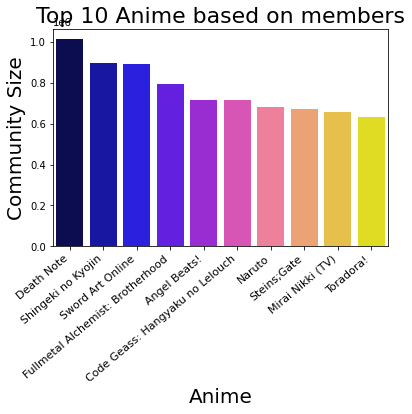

In [9]:
duplicate_anime=anime_fulldata.copy()
duplicate_anime.drop_duplicates(subset ="anime_title", keep = 'first', inplace = True)

top10_animemembers=duplicate_anime[['anime_title', 'members']].sort_values(by = 'members',ascending = False).head(10)
ax=sns.barplot(x="anime_title", y="members", data=top10_animemembers, palette="gnuplot2")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
ax.set_title('Top 10 Anime based on members',fontsize = 22)
ax.set_xlabel('Anime',fontsize = 20) 
ax.set_ylabel('Community Size', fontsize = 20)

# 4.The top three recommendations for the user with user_id 8086 
Answer :Sen to Chihiro no Kamikakushi、Mononoke Hime、Howl no Ugoku Shiro


In [29]:
rating.head(10)

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
5,1,355,-1
6,1,356,-1
7,1,442,-1
8,1,487,-1
9,1,846,-1


In [30]:
merge = pd.merge(anime,rating.drop("rating",axis=1))
merge

,anime_id,name,genre,type,episodes,rating,members,user_id
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278
...,...,...,...,...,...,...,...,...
7813722,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,39532
7813723,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,48766
7813724,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,60365
7813725,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142,27364


In [31]:
user_id_8086 = merge[merge['user_id']== 8086]
user_id_8086.sort_values(by=['rating'], ascending=False)

,anime_id,name,genre,type,episodes,rating,members,user_id
120550,199,Sen to Chihiro no Kamikakushi,"Adventure, Drama, Supernatural",Movie,1,8.93,466254,8086
228992,164,Mononoke Hime,"Action, Adventure, Fantasy",Movie,1,8.81,339556,8086
307287,431,Howl no Ugoku Shiro,"Adventure, Drama, Fantasy, Romance",Movie,1,8.74,333186,8086
702364,205,Samurai Champloo,"Action, Adventure, Comedy, Historical, Samurai...",TV,26,8.50,390076,8086
750644,523,Tonari no Totoro,"Adventure, Comedy, Supernatural",Movie,1,8.48,271484,8086
...,...,...,...,...,...,...,...,...
6830698,1243,Night Head Genesis,"Drama, Horror, Mystery, Psychological, Superna...",TV,24,6.88,20856,8086
6951665,2795,Dragonaut: The Resonance,"Action, Drama, Fantasy, Mecha, Romance, Sci-Fi",TV,25,6.81,45265,8086
7756014,2148,Okane ga Nai,"Drama, Romance, Yaoi",OVA,4,6.58,27367,8086
7370910,1734,Ajimu: Kaigan Monogatari,"Comedy, Drama, Romance, School",ONA,4,6.48,9102,8086


# 5.List top three users   recommend the anime_id 4935 
Answer : 

In [32]:
merge

,anime_id,name,genre,type,episodes,rating,members,user_id
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278
...,...,...,...,...,...,...,...,...
7813722,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,39532
7813723,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,48766
7813724,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,60365
7813725,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142,27364


In [34]:
anime_id_4935 = merge[merge['anime_id']==4935]
anime_id_4935.sort_values(by=['rating'], ascending=False)

,anime_id,name,genre,type,episodes,rating,members,user_id
6482564,4935,Ikkyuu-san,"Comedy, Historical, Kids",TV,296,7.05,720,1822
6482575,4935,Ikkyuu-san,"Comedy, Historical, Kids",TV,296,7.05,720,48766
6482583,4935,Ikkyuu-san,"Comedy, Historical, Kids",TV,296,7.05,720,64820
6482582,4935,Ikkyuu-san,"Comedy, Historical, Kids",TV,296,7.05,720,58378
6482581,4935,Ikkyuu-san,"Comedy, Historical, Kids",TV,296,7.05,720,56650
6482580,4935,Ikkyuu-san,"Comedy, Historical, Kids",TV,296,7.05,720,55670
6482579,4935,Ikkyuu-san,"Comedy, Historical, Kids",TV,296,7.05,720,53060
6482578,4935,Ikkyuu-san,"Comedy, Historical, Kids",TV,296,7.05,720,50822
6482577,4935,Ikkyuu-san,"Comedy, Historical, Kids",TV,296,7.05,720,50656
6482576,4935,Ikkyuu-san,"Comedy, Historical, Kids",TV,296,7.05,720,50537


In [ ]:
##使用文字雲觀察哪個類型最多人觀看

In [ ]:
nonull_anime=anime_fulldata.copy()
nonull_anime.dropna(inplace=True)
from collections import defaultdict

all_genres = defaultdict(int)

for genres in nonull_anime['genre']:
    for genre in genres.split(','):
        all_genres[genre.strip()] += 1
        
from wordcloud import WordCloud

genres_cloud = WordCloud(width=800, height=400, background_color='white', colormap='gnuplot').generate_from_frequencies(all_genres)
plt.imshow(genres_cloud, interpolation='bilinear')
plt.axis('off')